# Simplest case: 1 rotated surface code qubit, 1 QEC cylce


In [31]:
from typing import Literal, Tuple
from qeclib import RotSurfCode, SquareLattice, NoiseModel, PauliNoiseModel, QECPlot
import numpy as np
import stim
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pprint

In [32]:
d = 3
starting_state = "-"

Q1 = RotSurfCode(
    id="Q1",
    dx=d,
    dz=d,
)
circ = SquareLattice(name="", rows=d, cols=d)
circ.add_logical_qubit(Q1)

qecplot = QECPlot(circ)
qecplot.plot_logical_qubit("Q1")
qecplot.show()

circ.init("Q1", starting_state)

QEC_rounds_uuids = []

round_uuid = circ.add_par_def_syndrome_extraction_circuit_all_log_qbs()
QEC_rounds_uuids.append(round_uuid[0])

if starting_state in [0, 1, "0", "1"]:
    final_RO_id = circ.m_log_z("Q1")
elif starting_state in ["+", "-"]:
    final_RO_id = circ.m_log_x("Q1")
final_RO_id

'800f9df2-5d2d-46bb-8fbc-1e60a5839543'

In [33]:
# Define a noise model
p = 0.01
noise_model = PauliNoiseModel(p=p, p_2q=p, p_reset=p, p_mmt=p)

n_rep = np.arange(1, 16, 2)
num_shots = 1000

res = (
    stim.Circuit(circ.convert_to_stim(noise_model=noise_model))
    .compile_sampler()
    .sample(num_shots)
)
result_bits = []
for r in res:
    mmts = circ.dict_m_uuids_to_res(r)
    result_bits.append(np.sum(np.array(mmts[final_RO_id], dtype=int)) % 2)

exp_val = np.average(result_bits), np.std(result_bits) / np.sqrt(num_shots)

In [34]:
basis = "Z" if starting_state in [0,1,"0","1"] else "X"
print(f"<{basis}> = {exp_val[0]} +/- {np.round(exp_val[1], 2)}")

<X> = 0.879 +/- 0.01


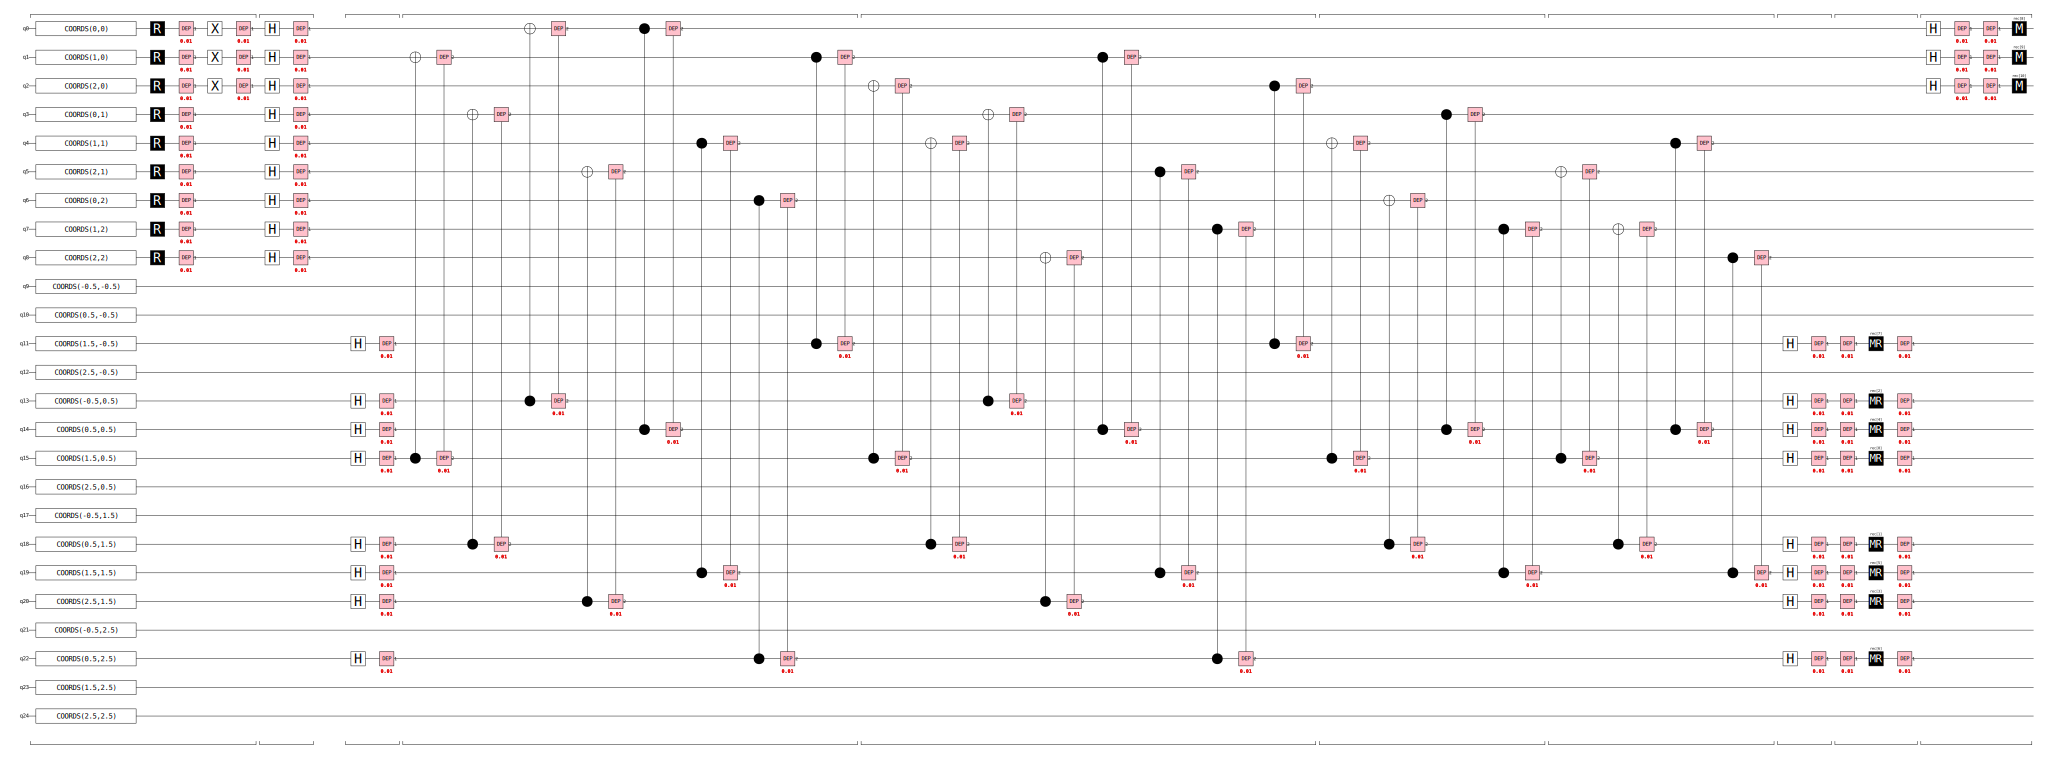

In [35]:
stim.Circuit(circ.convert_to_stim(noise_model=noise_model)).diagram(type="timeline-svg")